In [27]:
from pathlib import Path 
from collections import defaultdict
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [28]:
data = pd.read_csv('brba.csv')
data.head()

,First Characters Name,Second Characters Name,Season,Episode
0,Walter White,Jesse Pinkman,Season 1,Episode 1
1,Walter White,Skyler White,Season 1,Episode 1
2,Walter White,Walt JR,Season 1,Episode 1
3,Skyler White,Walt JR,Season 1,Episode 1
4,Walter White,Walt JR,Season 1,Episode 1


In [29]:
def create_graph(df_subset):
    G = nx.Graph()
    
    characters = pd.unique(df_subset[['First Characters Name', 'Second Characters Name']].values.ravel())
    G.add_nodes_from(characters)
    
    for _, row in df_subset.iterrows():
        c1 = row['First Characters Name']
        c2 = row['Second Characters Name']
        if G.has_edge(c1, c2):
            G[c1][c2]['weight'] += 1
        else:
            G.add_edge(c1, c2, weight=1)
    return G

df_sezona_1 = data[data['Season'] == "Season 1"]
G_sezona_1 = create_graph(df_sezona_1)

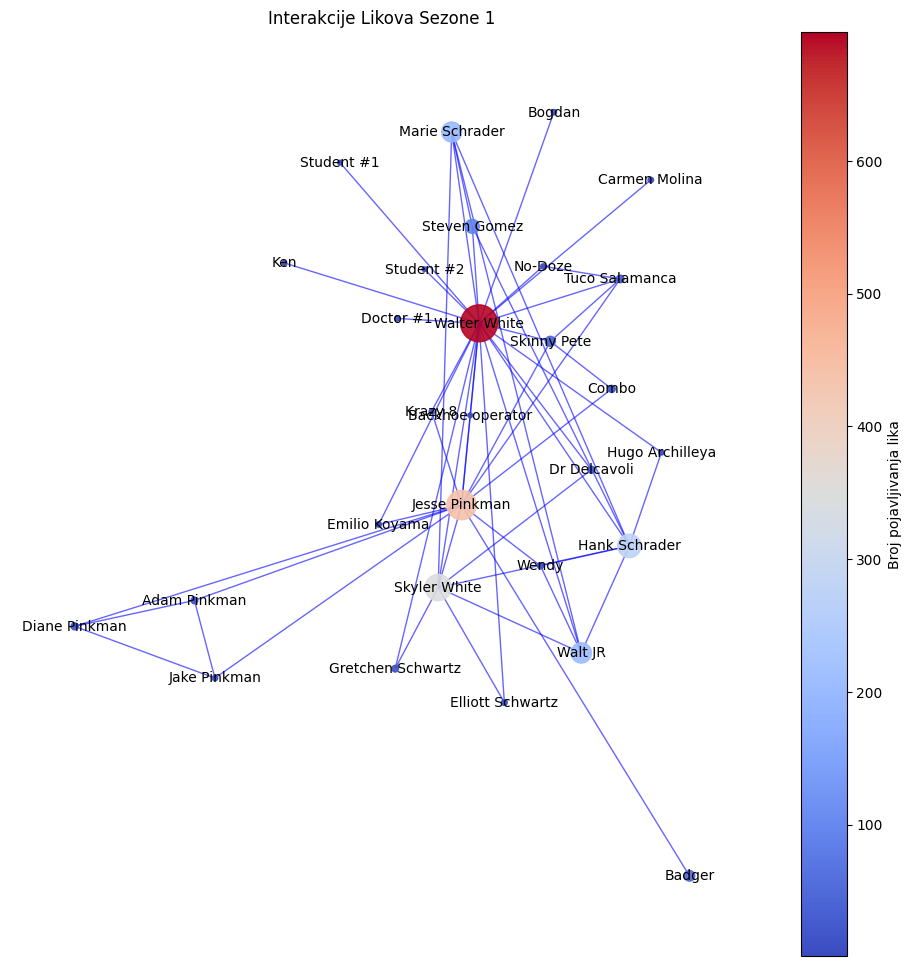

In [30]:
def plot_interactions(G, title):

    broj_pojavljivanja = {}
    for lik in G.nodes():
        count = (data['First Characters Name'] == lik).sum() + (data['Second Characters Name'] == lik).sum()
        broj_pojavljivanja[lik] = count

    node_sizes = [broj_pojavljivanja[lik] + 10 for lik in G.nodes()]
    node_colors = [broj_pojavljivanja[lik] for lik in G.nodes()]

    plt.figure(figsize=(12,12))
    ax = plt.gca()

    pos = nx.kamada_kawai_layout(G, weight='weight')

    nx.draw_networkx_nodes(G, pos,node_size=node_sizes,node_color=node_colors,cmap=plt.cm.coolwarm,alpha=0.9)

    nx.draw_networkx_edges(G, pos,alpha=0.6,edge_color='blue')

    nx.draw_networkx_labels(G, pos,font_size=10,font_family='sans-serif')

    sm = plt.cm.ScalarMappable(
        cmap=plt.cm.coolwarm,
        norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors))
    )
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label="Broj pojavljivanja lika")

    plt.title(title)
    plt.axis('off')
    plt.show()

plot_interactions(G_sezona_1, "Interakcije Likova Sezone 1")

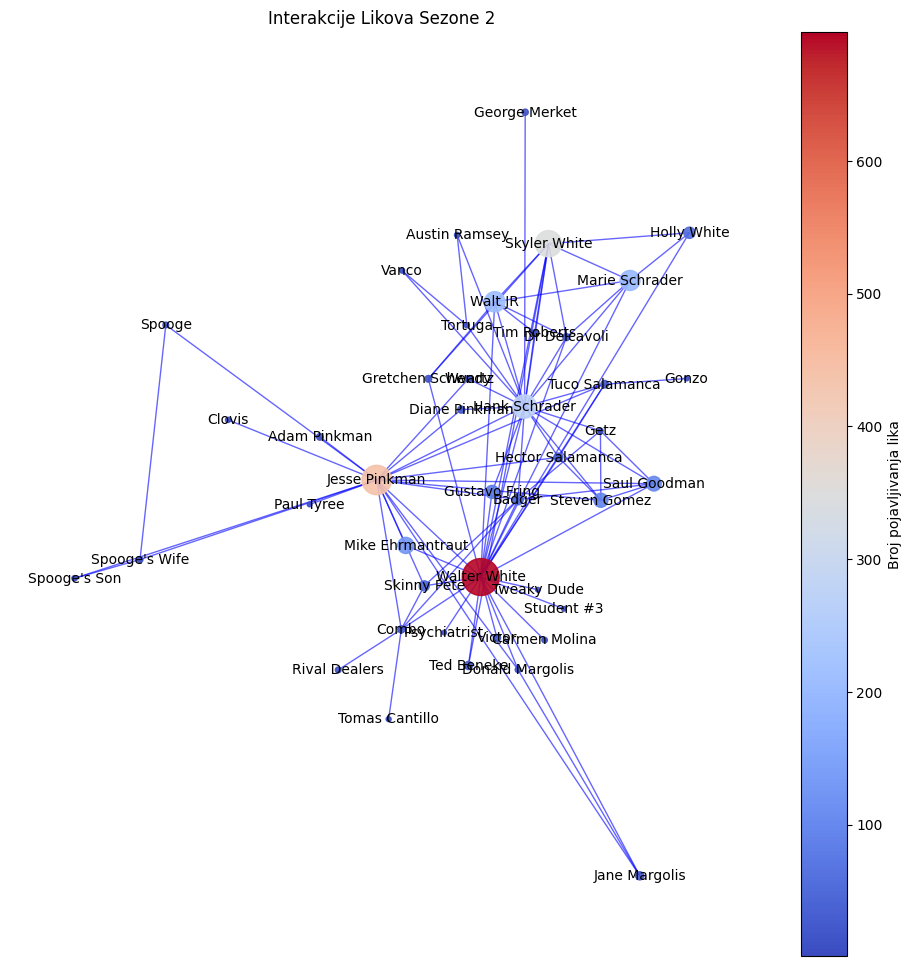

In [31]:
df_sezona_2 = data[data['Season'] == "Season 2"]
G_sezona_2 = create_graph(df_sezona_2)
plot_interactions(G_sezona_2, "Interakcije Likova Sezone 2")

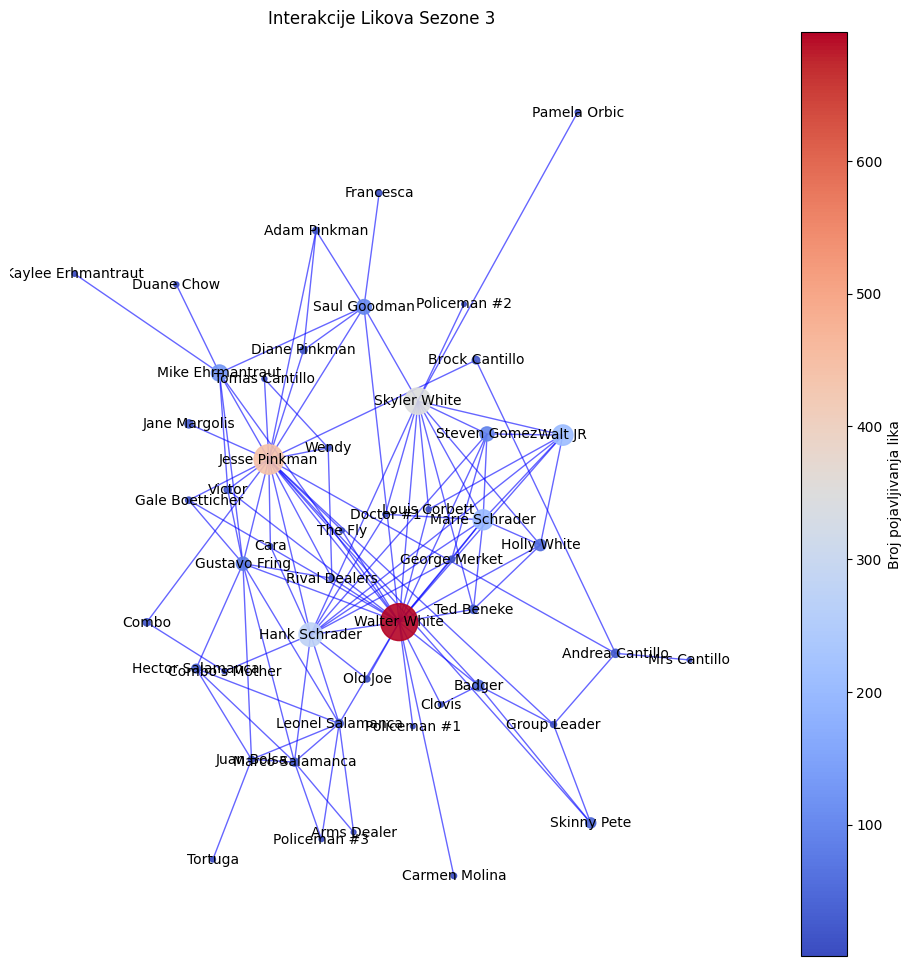

In [32]:
df_sezona_3 = data[data['Season'] == "Season 3"]
G_sezona_3 = create_graph(df_sezona_3)
plot_interactions(G_sezona_3, "Interakcije Likova Sezone 3")

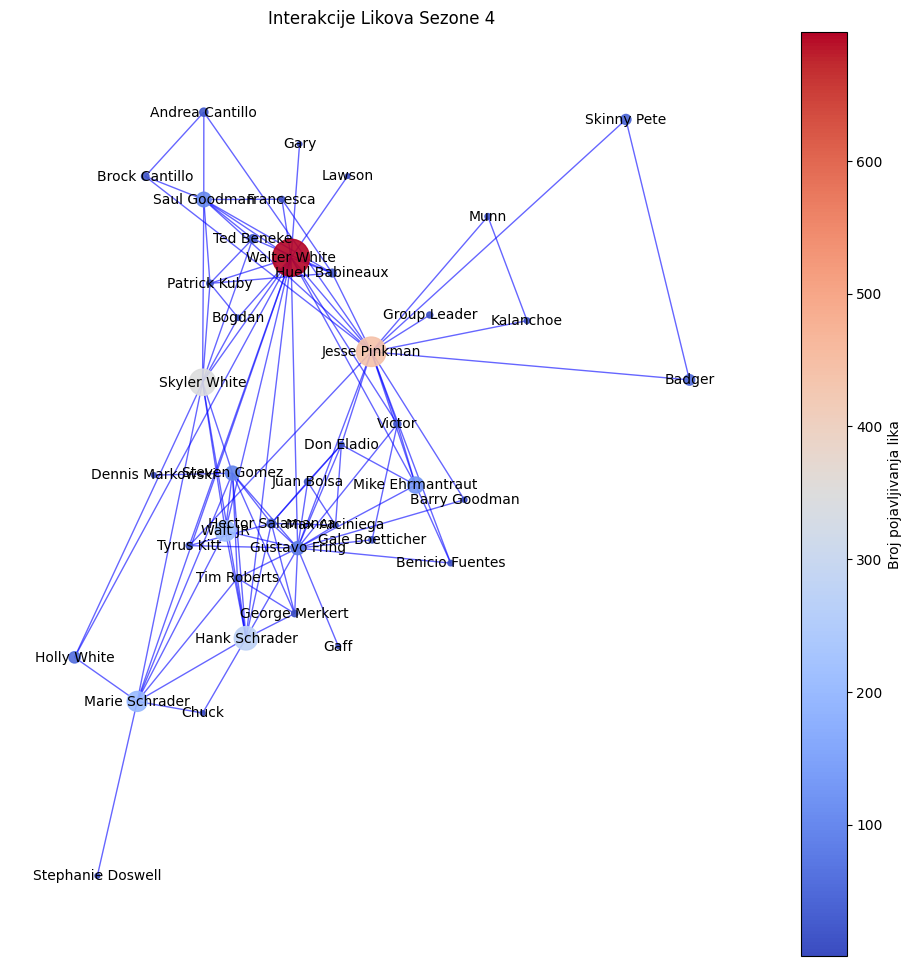

In [33]:
df_sezona_4 = data[data['Season'] == "Season 4"]
G_sezona_4 = create_graph(df_sezona_4)
plot_interactions(G_sezona_4, "Interakcije Likova Sezone 4")

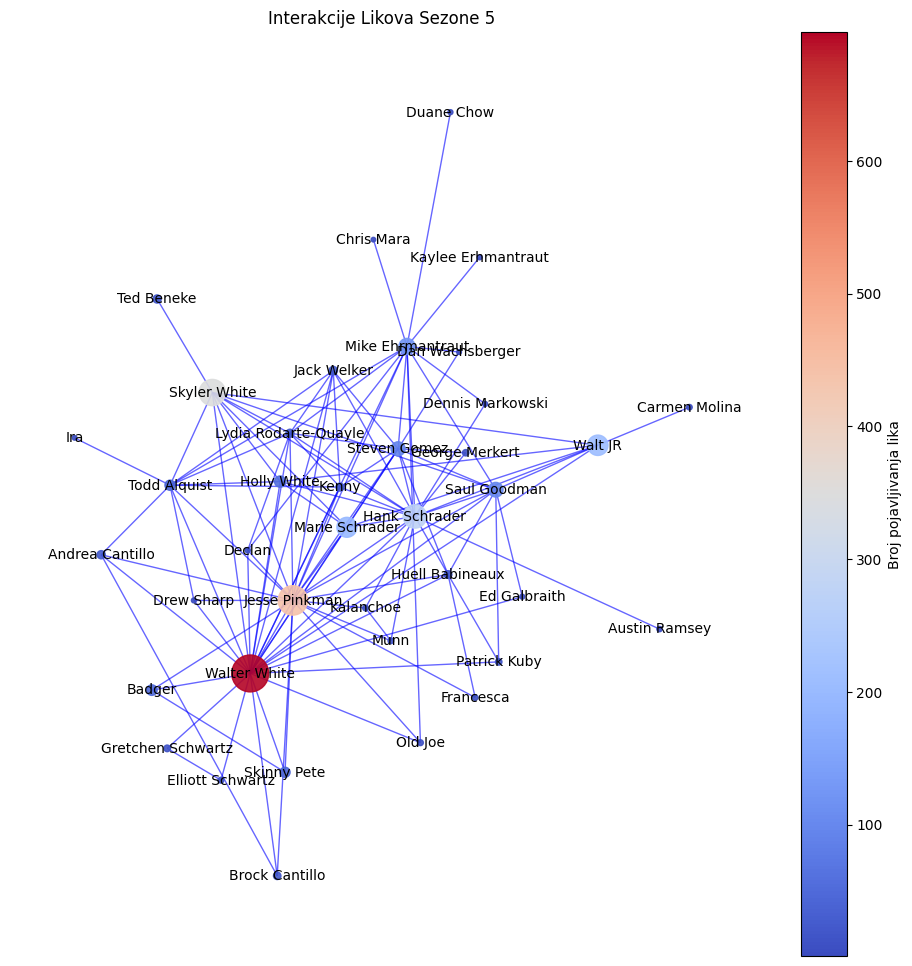

In [34]:
df_sezona_5 = data[data['Season'] == "Season 5"]
G_sezona_5 = create_graph(df_sezona_5)
plot_interactions(G_sezona_5, "Interakcije Likova Sezone 5")